# Feature Extraction and Price Prediction for Mobile Phones:

# Load The Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestRegressor
from scipy import stats
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Load The Dataset

In [2]:
#Load the dataset
Mobile_dataset = pd.read_csv("Processed_Flipdata.csv")
Mobile_dataset

,Unnamed: 0,Model,Colour,Memory,RAM,Battery_,Rear Camera,Front Camera,AI Lens,Mobile Height,Processor_,Prize
0,0,Infinix SMART 7,Night Black,64,4,6000,13MP,5MP,1,16.76,Unisoc Spreadtrum SC9863A1,"7,299"
1,1,Infinix SMART 7,Azure Blue,64,4,6000,13MP,5MP,1,16.76,Unisoc Spreadtrum SC9863A1,"7,299"
2,2,MOTOROLA G32,Mineral Gray,128,8,5000,50MP,16MP,0,16.64,Qualcomm Snapdragon 680,"11,999"
3,3,POCO C50,Royal Blue,32,2,5000,8MP,5MP,0,16.56,Mediatek Helio A22,"5,649"
4,4,Infinix HOT 30i,Marigold,128,8,5000,50MP,5MP,1,16.76,G37,"8,999"
...,...,...,...,...,...,...,...,...,...,...,...,...
536,637,SAMSUNG Galaxy S23 5G,Cream,256,8,3900,50MP,12MP,0,15.49,Qualcomm Snapdragon 8 Gen 2,"79,999"
537,638,LAVA Z21,Cyan,32,2,3100,5MP,2MP,0,12.70,Octa Core,"5,998"
538,639,Tecno Spark 8T,Turquoise Cyan,64,4,5000,50MP,8MP,0,16.76,MediaTek Helio G35,"9,990"
539,641,SAMSUNG Galaxy A54 5G,Awesome Lime,128,8,5000,50MP,32MP,0,16.26,"Exynos 1380, Octa Core","38,999"


In [3]:
# pd.set_option('display.max_rows',None)

In [4]:
Mobile_dataset = Mobile_dataset.drop(['Unnamed: 0'],axis=1)

In [5]:
Mobile_dataset

,Model,Colour,Memory,RAM,Battery_,Rear Camera,Front Camera,AI Lens,Mobile Height,Processor_,Prize
0,Infinix SMART 7,Night Black,64,4,6000,13MP,5MP,1,16.76,Unisoc Spreadtrum SC9863A1,"7,299"
1,Infinix SMART 7,Azure Blue,64,4,6000,13MP,5MP,1,16.76,Unisoc Spreadtrum SC9863A1,"7,299"
2,MOTOROLA G32,Mineral Gray,128,8,5000,50MP,16MP,0,16.64,Qualcomm Snapdragon 680,"11,999"
3,POCO C50,Royal Blue,32,2,5000,8MP,5MP,0,16.56,Mediatek Helio A22,"5,649"
4,Infinix HOT 30i,Marigold,128,8,5000,50MP,5MP,1,16.76,G37,"8,999"
...,...,...,...,...,...,...,...,...,...,...,...
536,SAMSUNG Galaxy S23 5G,Cream,256,8,3900,50MP,12MP,0,15.49,Qualcomm Snapdragon 8 Gen 2,"79,999"
537,LAVA Z21,Cyan,32,2,3100,5MP,2MP,0,12.70,Octa Core,"5,998"
538,Tecno Spark 8T,Turquoise Cyan,64,4,5000,50MP,8MP,0,16.76,MediaTek Helio G35,"9,990"
539,SAMSUNG Galaxy A54 5G,Awesome Lime,128,8,5000,50MP,32MP,0,16.26,"Exynos 1380, Octa Core","38,999"


In [6]:
Mobile_dataset.tail()

,Model,Colour,Memory,RAM,Battery_,Rear Camera,Front Camera,AI Lens,Mobile Height,Processor_,Prize
536,SAMSUNG Galaxy S23 5G,Cream,256,8,3900,50MP,12MP,0,15.49,Qualcomm Snapdragon 8 Gen 2,"79,999"
537,LAVA Z21,Cyan,32,2,3100,5MP,2MP,0,12.70,Octa Core,"5,998"
538,Tecno Spark 8T,Turquoise Cyan,64,4,5000,50MP,8MP,0,16.76,MediaTek Helio G35,"9,990"
539,SAMSUNG Galaxy A54 5G,Awesome Lime,128,8,5000,50MP,32MP,0,16.26,"Exynos 1380, Octa Core","38,999"
540,OPPO A77,Sky Blue,128,4,5000,50MP,8MP,0,16.66,Mediatek Helio G35,"15,999"


# Finding Missing values

In [7]:
Mobile_dataset.isnull()

,Model,Colour,Memory,RAM,Battery_,Rear Camera,Front Camera,AI Lens,Mobile Height,Processor_,Prize
0,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...
536,False,False,False,False,False,False,False,False,False,False,False
537,False,False,False,False,False,False,False,False,False,False,False
538,False,False,False,False,False,False,False,False,False,False,False
539,False,False,False,False,False,False,False,False,False,False,False


In [8]:
Mobile_dataset.isnull().sum()

Model            0
Colour           0
Memory           0
RAM              0
Battery_         0
Rear Camera      0
Front Camera     0
AI Lens          0
Mobile Height    0
Processor_       0
Prize            0
dtype: int64

In [9]:
Mobile_dataset_missing_values = Mobile_dataset.columns[Mobile_dataset.isnull().any()].tolist()

In [10]:
Mobile_dataset_missing_values

[]

#### No any missing values Found

## Understanding The Data

In [11]:
Mobile_dataset.describe()

,Memory,RAM,Battery_,AI Lens,Mobile Height
count,541.000000,541.000000,541.000000,541.000000,541.000000
mean,110.550832,5.397412,4871.587800,0.062847,16.431201
std,60.600694,1.984923,780.148862,0.242911,2.523553
min,16.000000,2.000000,800.000000,0.000000,4.500000
25%,64.000000,4.000000,5000.000000,0.000000,16.510000
50%,128.000000,6.000000,5000.000000,0.000000,16.710000
75%,128.000000,8.000000,5000.000000,0.000000,16.940000
max,256.000000,8.000000,7000.000000,1.000000,41.940000


In [12]:
Mobile_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541 entries, 0 to 540
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Model          541 non-null    object 
 1   Colour         541 non-null    object 
 2   Memory         541 non-null    int64  
 3   RAM            541 non-null    int64  
 4   Battery_       541 non-null    int64  
 5   Rear Camera    541 non-null    object 
 6   Front Camera   541 non-null    object 
 7   AI Lens        541 non-null    int64  
 8   Mobile Height  541 non-null    float64
 9   Processor_     541 non-null    object 
 10  Prize          541 non-null    object 
dtypes: float64(1), int64(4), object(6)
memory usage: 46.6+ KB


In [13]:
# Showing Categorical features
cate_features = Mobile_dataset.select_dtypes(include=['object']).columns
print('Total number of categorical features:',cate_features.shape[0] )

print('categorical feature names:', cate_features.tolist())

Total number of categorical features: 6
categorical feature names: ['Model', 'Colour', 'Rear Camera', 'Front Camera', 'Processor_', 'Prize']


In [14]:
Mobile_dataset['Model'].unique

<bound method Series.unique of 0            Infinix SMART 7
1            Infinix SMART 7
2               MOTOROLA G32
3                   POCO C50
4            Infinix HOT 30i
               ...          
536    SAMSUNG Galaxy S23 5G
537                 LAVA Z21
538           Tecno Spark 8T
539    SAMSUNG Galaxy A54 5G
540                 OPPO A77
Name: Model, Length: 541, dtype: object>

In [15]:
Mobile_dataset['Model'].value_counts()

vivo Y16                 9
realme C55               9
SAMSUNG Galaxy A14 5G    9
REDMI Note 12 Pro 5G     9
vivo T1 44W              8
                        ..
vivo Y1s                 1
OnePlus Nord             1
Micromax 3               1
vivo Y33s                1
OPPO A77                 1
Name: Model, Length: 187, dtype: int64

In [16]:
Mobile_dataset['Colour'].value_counts()

Yellow            12
Royal Blue         8
Power Black        8
Black              8
Midnight Black     7
                  ..
Polar Blue         1
Cosmic grey        1
Sea                1
Infinity Black     1
Sky Blue           1
Name: Colour, Length: 275, dtype: int64

In [17]:
Mobile_dataset['Rear Camera'].value_counts()

50MP     260
13MP      63
64MP      62
8MP       52
48MP      31
108MP     31
0MP       10
12MP      10
200MP      8
2MP        6
5MP        3
40MP       2
32MP       2
16MP       1
Name: Rear Camera, dtype: int64

In [18]:
Mobile_dataset['Front Camera'].value_counts()

16MP    164
5MP     135
8MP     129
13MP     49
32MP     22
0MP      16
50MP      7
12MP      6
60MP      4
2MP       3
10MP      2
20MP      2
44MP      2
Name: Front Camera, dtype: int64

In [19]:
Mobile_dataset['Processor_'].value_counts()

Qualcomm Snapdragon 680        33
Unisoc T612                    21
Mediatek Helio A22             19
Mediatek Dimensity 1080        18
Qualcomm Snapdragon 695 5G     17
                               ..
Qualcomm Snapdragon 439         1
Snapdragon 680                  1
snapdragon 888                  1
Qualcomm Snapdragon 855         1
Qualcomm Snapdragon 8 Gen 2     1
Name: Processor_, Length: 123, dtype: int64

In [20]:
Mobile_dataset['Prize'].unique

<bound method Series.unique of 0       7,299
1       7,299
2      11,999
3       5,649
4       8,999
        ...  
536    79,999
537     5,998
538     9,990
539    38,999
540    15,999
Name: Prize, Length: 541, dtype: object>

In [21]:
Mobile_dataset['Prize'] = Mobile_dataset['Prize'].str.replace(',', '').astype(int)

In [22]:
Mobile_dataset['Prize'].unique

<bound method Series.unique of 0       7299
1       7299
2      11999
3       5649
4       8999
       ...  
536    79999
537     5998
538     9990
539    38999
540    15999
Name: Prize, Length: 541, dtype: int32>

In [23]:
Mobile_dataset

,Model,Colour,Memory,RAM,Battery_,Rear Camera,Front Camera,AI Lens,Mobile Height,Processor_,Prize
0,Infinix SMART 7,Night Black,64,4,6000,13MP,5MP,1,16.76,Unisoc Spreadtrum SC9863A1,7299
1,Infinix SMART 7,Azure Blue,64,4,6000,13MP,5MP,1,16.76,Unisoc Spreadtrum SC9863A1,7299
2,MOTOROLA G32,Mineral Gray,128,8,5000,50MP,16MP,0,16.64,Qualcomm Snapdragon 680,11999
3,POCO C50,Royal Blue,32,2,5000,8MP,5MP,0,16.56,Mediatek Helio A22,5649
4,Infinix HOT 30i,Marigold,128,8,5000,50MP,5MP,1,16.76,G37,8999
...,...,...,...,...,...,...,...,...,...,...,...
536,SAMSUNG Galaxy S23 5G,Cream,256,8,3900,50MP,12MP,0,15.49,Qualcomm Snapdragon 8 Gen 2,79999
537,LAVA Z21,Cyan,32,2,3100,5MP,2MP,0,12.70,Octa Core,5998
538,Tecno Spark 8T,Turquoise Cyan,64,4,5000,50MP,8MP,0,16.76,MediaTek Helio G35,9990
539,SAMSUNG Galaxy A54 5G,Awesome Lime,128,8,5000,50MP,32MP,0,16.26,"Exynos 1380, Octa Core",38999


In [24]:
Mobile_dataset.isnull().sum().sum()

0

# Convert Categorical features into Numerical features with the Oridinal Encoding

## OrdinalEncoding

In [25]:
# Checking value counts
Mobile_dataset['Rear Camera'].value_counts()

50MP     260
13MP      63
64MP      62
8MP       52
48MP      31
108MP     31
0MP       10
12MP      10
200MP      8
2MP        6
5MP        3
40MP       2
32MP       2
16MP       1
Name: Rear Camera, dtype: int64

In [26]:
Rear_Camera = ['0MP','2MP','5MP','8MP','12MP','13MP','16MP','32MP','40MP','48MP','50MP','64MP','108MP','200MP']
enc = OrdinalEncoder(categories = [Rear_Camera])
enc.fit_transform(Mobile_dataset[['Rear Camera']])

array([[ 5.],
       [ 5.],
       [10.],
       [ 3.],
       [10.],
       [10.],
       [10.],
       [10.],
       [10.],
       [10.],
       [10.],
       [10.],
       [ 5.],
       [10.],
       [ 5.],
       [ 3.],
       [10.],
       [ 3.],
       [ 3.],
       [ 5.],
       [10.],
       [10.],
       [10.],
       [10.],
       [10.],
       [10.],
       [10.],
       [10.],
       [ 3.],
       [ 3.],
       [ 3.],
       [10.],
       [ 3.],
       [10.],
       [10.],
       [10.],
       [10.],
       [10.],
       [10.],
       [10.],
       [10.],
       [10.],
       [ 5.],
       [10.],
       [10.],
       [10.],
       [10.],
       [10.],
       [10.],
       [10.],
       [ 8.],
       [ 8.],
       [10.],
       [ 3.],
       [ 7.],
       [ 7.],
       [10.],
       [10.],
       [10.],
       [10.],
       [10.],
       [10.],
       [ 5.],
       [10.],
       [10.],
       [10.],
       [10.],
       [10.],
       [ 3.],
       [ 3.],
       [ 3.],
      

In [27]:
Mobile_dataset[['Rear Camera']] = enc.fit_transform(Mobile_dataset[['Rear Camera']])

In [28]:
Mobile_dataset['Rear Camera'].value_counts()

10.0    260
5.0      63
11.0     62
3.0      52
9.0      31
12.0     31
0.0      10
4.0      10
13.0      8
1.0       6
2.0       3
8.0       2
7.0       2
6.0       1
Name: Rear Camera, dtype: int64

In [29]:
# Checking value counts
Mobile_dataset['Front Camera'].value_counts()

16MP    164
5MP     135
8MP     129
13MP     49
32MP     22
0MP      16
50MP      7
12MP      6
60MP      4
2MP       3
10MP      2
20MP      2
44MP      2
Name: Front Camera, dtype: int64

In [30]:
Front_Camera = ['0MP','2MP','5MP','8MP','10MP','12MP','13MP','16MP','20MP','32MP','44MP','50MP','60MP']
enc = OrdinalEncoder(categories = [Front_Camera])
enc.fit_transform(Mobile_dataset[['Front Camera']])

array([[ 2.],
       [ 2.],
       [ 7.],
       [ 2.],
       [ 2.],
       [ 2.],
       [ 2.],
       [ 2.],
       [ 2.],
       [ 2.],
       [ 2.],
       [ 2.],
       [ 2.],
       [ 3.],
       [ 2.],
       [ 2.],
       [ 2.],
       [ 2.],
       [ 2.],
       [ 2.],
       [ 3.],
       [ 3.],
       [ 3.],
       [ 3.],
       [ 3.],
       [ 3.],
       [ 3.],
       [ 3.],
       [ 2.],
       [ 2.],
       [ 2.],
       [ 2.],
       [ 2.],
       [ 2.],
       [ 2.],
       [ 2.],
       [ 3.],
       [ 3.],
       [ 3.],
       [ 3.],
       [ 3.],
       [ 2.],
       [ 2.],
       [ 7.],
       [ 2.],
       [ 3.],
       [ 3.],
       [ 3.],
       [ 3.],
       [ 2.],
       [ 7.],
       [ 7.],
       [ 7.],
       [ 2.],
       [ 7.],
       [ 7.],
       [ 3.],
       [ 7.],
       [ 3.],
       [ 3.],
       [ 3.],
       [ 3.],
       [ 2.],
       [ 2.],
       [ 2.],
       [ 6.],
       [ 7.],
       [ 2.],
       [ 2.],
       [ 2.],
       [ 2.],
      

In [31]:
Mobile_dataset[['Front Camera']] = enc.fit_transform(Mobile_dataset[['Front Camera']])

In [32]:
Mobile_dataset['Front Camera'].value_counts()

7.0     164
2.0     135
3.0     129
6.0      49
9.0      22
0.0      16
11.0      7
5.0       6
12.0      4
1.0       3
4.0       2
8.0       2
10.0      2
Name: Front Camera, dtype: int64

In [33]:
# Checking value counts
Mobile_dataset['Processor_'].value_counts()

Qualcomm Snapdragon 680        33
Unisoc T612                    21
Mediatek Helio A22             19
Mediatek Dimensity 1080        18
Qualcomm Snapdragon 695 5G     17
                               ..
Qualcomm Snapdragon 439         1
Snapdragon 680                  1
snapdragon 888                  1
Qualcomm Snapdragon 855         1
Qualcomm Snapdragon 8 Gen 2     1
Name: Processor_, Length: 123, dtype: int64

In [34]:
Mobile_dataset['Processor_'].unique()

array(['Unisoc Spreadtrum SC9863A1', 'Qualcomm Snapdragon 680',
       'Mediatek Helio A22', 'G37', 'Exynos 850', 'Mediatek Helio P35',
       'Helio G36', 'Unisoc T606', 'Dimensity 6020',
       'Spreadtrum SC9863A1', 'Mediatek Helio G85', 'Helio G85',
       'Mediatek Dimensity 700', 'Mediatek Helio G37', 'Snapdragon 695',
       'Qualcomm Snapdragon 695 5G', 'Mediatek Helio G99', 'Unisoc T612',
       'Exynos 1330, Octa Core ', 'Mediatek Dimensity 930',
       'Qualcomm Snapdragon 695', 'Mediatek Helio G96', 'Helio G99',
       'Helio G88', 'SC6531E', 'Mediatek Dimensity 810',
       'MediaTek Dimensity 800U', 'Mediatek Dimensity 810 5G',
       'Qualcomm Snapdragon 750G', 'Dimensity 8020', 'MediaTek Helio G95',
       'Mediatek Helio G99 Octa Core', 'MediaTek Helio G96', 'MediaTek',
       'Google Tensor', 'Dimensity 810', 'Qualcomm Snapdragon 888',
       'Snapdragon 685', 'Qualcomm Snapdragon 4 Gen 1', '0 0 0 208MHz',
       'MediaTek Helio P35', 'Dimensity 8100', 'UNISOC T700',


In [35]:
Prosessor_ = ['Unisoc Spreadtrum SC9863A1', 'Qualcomm Snapdragon 680',
       'Mediatek Helio A22', 'G37', 'Exynos 850', 'Mediatek Helio P35',
       'Helio G36', 'Unisoc T606', 'Dimensity 6020',
       'Spreadtrum SC9863A1', 'Mediatek Helio G85', 'Helio G85',
       'Mediatek Dimensity 700', 'Mediatek Helio G37', 'Snapdragon 695',
       'Qualcomm Snapdragon 695 5G', 'Mediatek Helio G99', 'Unisoc T612',
       'Exynos 1330, Octa Core ', 'Mediatek Dimensity 930',
       'Qualcomm Snapdragon 695', 'Mediatek Helio G96', 'Helio G99',
       'Helio G88', 'SC6531E', 'Mediatek Dimensity 810',
       'MediaTek Dimensity 800U', 'Mediatek Dimensity 810 5G',
       'Qualcomm Snapdragon 750G', 'Dimensity 8020', 'MediaTek Helio G95',
       'Mediatek Helio G99 Octa Core', 'MediaTek Helio G96', 'MediaTek',
       'Google Tensor', 'Dimensity 810', 'Qualcomm Snapdragon 888',
       'Snapdragon 685', 'Qualcomm Snapdragon 4 Gen 1', '0 0 0 208MHz',
       'MediaTek Helio P35', 'Dimensity 8100', 'UNISOC T700',
       'Mediatek Helio G35', 'MediaTek Helio G85',
       'Qualcomm Snapdragon 778G', 'MediaTek Dimensity 700',
       'Unisoc T610', 'Unisoc T612 processor', 'Mediatek Dimensity 1080',
       'Mediatek Dimensity 920', 'Unisoc Tiger T612 (12 nm)',
       'Qualcomm Snapdragon 8 Gen 1', 'Mediatek Dimensity 7200 5G',
       'MediaTek G37', 'Qualcomm Snapdragon 7+ Gen 2 (4nm)', 'Octa Core',
       'MT6260A', 'MTK6261D', 'Spreadtrum', 'Mediatek MT6261D',
       'Meditek Helio G37', 'SC9863A',
       'Qualcomm Snapdragon 888 Octa-Core', 'Mediatek G99',
       'Qualcomm Snapdragon 778G Plus', 'Qualcomm Snapdragon 888 +',
       'MediaTek Helio G88', 'Tensor G2', 'MediaTek Helio G37',
       'SEC S5E8535 (Exynos 1330)', 'MediaTek Helio G35',
       'Qualcomm Snapdragon 730G', 'Qualcomm Snapdragon 778G+', 'Android',
       '2GHz, Quad Core ', 'Qualcomm Snapdragon 695 (SM6375)',
       'Unisoc Tiger T616', 'Unisoc', 'Oxygen OS',
       'Mediatek Dimensity 1080 5G', 'Qualcomm Snapdragon 680 (SM6225)',
       'Dimensity 1080, Octa Core ', 'Mediatek Helio G88', 'Helio A22',
       'Unisoc SC9863A/ Unisoc SC9863A1', 'Qualcomm Snapdragon 8+ Gen 1',
       'Snapdragon 8 Gen 1', 'Mediatek G96', 'Google Tensor G2',
       'Qualcomm Snapdragon 845', 'Qualcomm Snapdragon 439',
       'Octa-core(EXYNOS)', 'Mediatek Dimensity 900', 'Helio G25',
       'Snapdragon 680', 'snapdragon 888', 'Qualcomm Snapdragon 855',
       'Qualcomm Snapdragon 865', 'QualcommÂ® Snapdragonâ_x0084_¢ 765G',
       'Unisoc SC9863A', 'Exynos 1380, Octa Core ', 'MediaTek Helio G80',
       'Mediatek Helio G95', 'Qualcomm Snapdragon 855+', 'ios',
       'Qualcomm Snapdragon 778G 5G Mobile Platform',
       'MediaTek Helio A20', 'MediaTek G35', 'MediaTek Helio A22',
       'Unisoc T616', 'MediaTek Helio G25', 'MTK Dimensity 700',
       'Qualcomm Snapdragon 720G', 'IOS', 'Mediatek Dimensity 1300',
       'MediaTek Helio G70', 'Octa-core', '6 Core', 'Dimensity 8200',
       'Qualcomm SM6225 Snapdragon 680 4G (6 nm)', 'Exynos Octa Core',
       'Qualcomm Snapdragon 8 Gen 2']
enc = OrdinalEncoder(categories = [Prosessor_])
enc.fit_transform(Mobile_dataset[['Processor_']])

array([[  0.],
       [  0.],
       [  1.],
       [  2.],
       [  3.],
       [  3.],
       [  3.],
       [  3.],
       [  3.],
       [  3.],
       [  1.],
       [  3.],
       [  0.],
       [  4.],
       [  5.],
       [  6.],
       [  3.],
       [  6.],
       [  2.],
       [  7.],
       [  8.],
       [  8.],
       [  8.],
       [  8.],
       [  8.],
       [  8.],
       [  8.],
       [  8.],
       [  9.],
       [  2.],
       [  2.],
       [ 10.],
       [  2.],
       [ 10.],
       [ 10.],
       [ 10.],
       [  4.],
       [  4.],
       [ 11.],
       [ 12.],
       [ 13.],
       [  1.],
       [  5.],
       [  1.],
       [  1.],
       [  4.],
       [ 13.],
       [ 11.],
       [ 13.],
       [ 10.],
       [ 14.],
       [ 14.],
       [ 15.],
       [  2.],
       [ 14.],
       [ 14.],
       [ 16.],
       [ 15.],
       [ 12.],
       [  4.],
       [  4.],
       [ 16.],
       [  7.],
       [ 17.],
       [ 17.],
       [ 18.],
       [ 1

In [36]:
Mobile_dataset[['Processor_']] = enc.fit_transform(Mobile_dataset[['Processor_']])

In [37]:
Mobile_dataset['Processor_'].value_counts()

1.0      33
17.0     21
2.0      19
49.0     18
15.0     17
         ..
91.0      1
95.0      1
96.0      1
97.0      1
122.0     1
Name: Processor_, Length: 123, dtype: int64

In [38]:
Mobile_dataset

,Model,Colour,Memory,RAM,Battery_,Rear Camera,Front Camera,AI Lens,Mobile Height,Processor_,Prize
0,Infinix SMART 7,Night Black,64,4,6000,5.0,2.0,1,16.76,0.0,7299
1,Infinix SMART 7,Azure Blue,64,4,6000,5.0,2.0,1,16.76,0.0,7299
2,MOTOROLA G32,Mineral Gray,128,8,5000,10.0,7.0,0,16.64,1.0,11999
3,POCO C50,Royal Blue,32,2,5000,3.0,2.0,0,16.56,2.0,5649
4,Infinix HOT 30i,Marigold,128,8,5000,10.0,2.0,1,16.76,3.0,8999
...,...,...,...,...,...,...,...,...,...,...,...
536,SAMSUNG Galaxy S23 5G,Cream,256,8,3900,10.0,5.0,0,15.49,122.0,79999
537,LAVA Z21,Cyan,32,2,3100,2.0,1.0,0,12.70,56.0,5998
538,Tecno Spark 8T,Turquoise Cyan,64,4,5000,10.0,3.0,0,16.76,71.0,9990
539,SAMSUNG Galaxy A54 5G,Awesome Lime,128,8,5000,10.0,9.0,0,16.26,101.0,38999


# Convert Categorical features into Numerical features with the OneHot Encoding

## OneHotEncoding

In [39]:
# Convert categorical to numerical

Mobile_dataset_encod = Mobile_dataset.copy()

object_features = Mobile_dataset_encod.select_dtypes(include = 'object').columns.tolist()
print('Total object data type features', len(object_features))

print('Features: \n', object_features)

Total object data type features 2
Features: 
 ['Model', 'Colour']


In [40]:
# Select Categorical columns

categorical_cols = ['Model', 'Colour']

# Create a Dataframe containing only the categorical columns
categorical_data = Mobile_dataset_encod[categorical_cols]
categorical_data.sample(10)

,Model,Colour
151,Infinix HOT 20 5G,Racing Black
172,Infinix Smart 6 HD,Force Black
244,redmi max,M3)
132,SAMSUNG Galaxy F14 5G,OMG Black
427,SAMSUNG Galaxy A23,Black
497,Infinix Hot 11,Emerald Green
167,realme 8i,Space Purple
448,vivo Y16,Steller Black
393,Tecno Pop 5 Pro,Ice Blue
186,realme 9i 5G,Soulful Blue


In [41]:
# Apply OneHot Codig
encoder = OneHotEncoder(drop ='first' , sparse = False) # 'drop=first' to avoid multicollinearity
encoded_data = pd.DataFrame(encoder.fit_transform(categorical_data))

C:\Users\NITESH NAMDEV\anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:828: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [42]:
# Replace Original categorical columns with encoded columns in the original dataframe
Mobile_dataset_encod.drop(columns=categorical_cols, inplace=True)
Mobile_dataset_encod = pd.concat([Mobile_dataset_encod,encoded_data], axis=1)

# Now, data contains encoded categorical features

In [43]:
Mobile_dataset_encod.sample(10)

,Memory,RAM,Battery_,Rear Camera,Front Camera,AI Lens,Mobile Height,Processor_,Prize,0,...,450,451,452,453,454,455,456,457,458,459
252,128,6,5000,10.0,3.0,0,16.71,22.0,11999,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
487,64,4,5000,5.0,2.0,0,16.59,111.0,8999,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
219,64,2,5000,5.0,2.0,0,16.51,7.0,6799,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
404,128,8,5000,11.0,7.0,0,17.22,87.0,30385,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
42,64,4,5000,5.0,2.0,0,16.51,5.0,7299,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
322,128,4,5000,10.0,3.0,0,16.76,28.0,15999,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
316,128,8,5000,10.0,7.0,0,16.94,49.0,25999,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
375,64,2,5000,3.0,2.0,0,16.76,2.0,6999,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
503,128,6,5000,10.0,2.0,0,17.04,44.0,10799,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
23,128,6,5000,10.0,3.0,0,16.71,8.0,13999,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [44]:
Mobile_dataset_encod.select_dtypes(include='object').columns.tolist()

[]

In [45]:
Mobile_dataset_encod.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541 entries, 0 to 540
Columns: 469 entries, Memory to 459
dtypes: float64(464), int32(1), int64(4)
memory usage: 1.9 MB


In [46]:
Mobile_dataset_encod

,Memory,RAM,Battery_,Rear Camera,Front Camera,AI Lens,Mobile Height,Processor_,Prize,0,...,450,451,452,453,454,455,456,457,458,459
0,64,4,6000,5.0,2.0,1,16.76,0.0,7299,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,64,4,6000,5.0,2.0,1,16.76,0.0,7299,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,128,8,5000,10.0,7.0,0,16.64,1.0,11999,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,32,2,5000,3.0,2.0,0,16.56,2.0,5649,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,128,8,5000,10.0,2.0,1,16.76,3.0,8999,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
536,256,8,3900,10.0,5.0,0,15.49,122.0,79999,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
537,32,2,3100,2.0,1.0,0,12.70,56.0,5998,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
538,64,4,5000,10.0,3.0,0,16.76,71.0,9990,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
539,128,8,5000,10.0,9.0,0,16.26,101.0,38999,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [47]:
# Creating cleaned numeric dataset (without categorical value) 

Mobile_dataset_encod.to_csv('copy of original dataset without categorical data.csv',index=False)

In [48]:
# Showing Numerical features

numerical_features = [feature for feature in Mobile_dataset_encod.columns if Mobile_dataset_encod[feature].dtypes !=  'O']

print('number of numerical variables:' , len (numerical_features))

Mobile_dataset_encod[numerical_features].head()

number of numerical variables: 469


,Memory,RAM,Battery_,Rear Camera,Front Camera,AI Lens,Mobile Height,Processor_,Prize,0,...,450,451,452,453,454,455,456,457,458,459
0,64,4,6000,5.0,2.0,1,16.76,0.0,7299,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,64,4,6000,5.0,2.0,1,16.76,0.0,7299,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,128,8,5000,10.0,7.0,0,16.64,1.0,11999,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,32,2,5000,3.0,2.0,0,16.56,2.0,5649,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,128,8,5000,10.0,2.0,1,16.76,3.0,8999,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [49]:
Mobile_price_encoded = Mobile_dataset_encod

In [50]:
Mobile_price_encoded

,Memory,RAM,Battery_,Rear Camera,Front Camera,AI Lens,Mobile Height,Processor_,Prize,0,...,450,451,452,453,454,455,456,457,458,459
0,64,4,6000,5.0,2.0,1,16.76,0.0,7299,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,64,4,6000,5.0,2.0,1,16.76,0.0,7299,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,128,8,5000,10.0,7.0,0,16.64,1.0,11999,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,32,2,5000,3.0,2.0,0,16.56,2.0,5649,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,128,8,5000,10.0,2.0,1,16.76,3.0,8999,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
536,256,8,3900,10.0,5.0,0,15.49,122.0,79999,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
537,32,2,3100,2.0,1.0,0,12.70,56.0,5998,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
538,64,4,5000,10.0,3.0,0,16.76,71.0,9990,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
539,128,8,5000,10.0,9.0,0,16.26,101.0,38999,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# Finding Outlier and Trimming and Capping that

In [51]:
# Finding Outlier in Numerical features

numerical_features = [feature for feature in Mobile_dataset_encod.columns if Mobile_dataset_encod[feature].dtypes !=  'O']

print('number of numerical variables:' , len (numerical_features))

Mobile_dataset_encod[numerical_features].head()

number of numerical variables: 469


,Memory,RAM,Battery_,Rear Camera,Front Camera,AI Lens,Mobile Height,Processor_,Prize,0,...,450,451,452,453,454,455,456,457,458,459
0,64,4,6000,5.0,2.0,1,16.76,0.0,7299,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,64,4,6000,5.0,2.0,1,16.76,0.0,7299,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,128,8,5000,10.0,7.0,0,16.64,1.0,11999,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,32,2,5000,3.0,2.0,0,16.56,2.0,5649,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,128,8,5000,10.0,2.0,1,16.76,3.0,8999,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


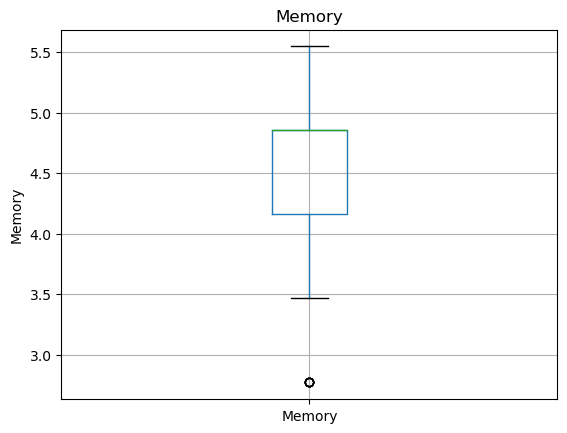

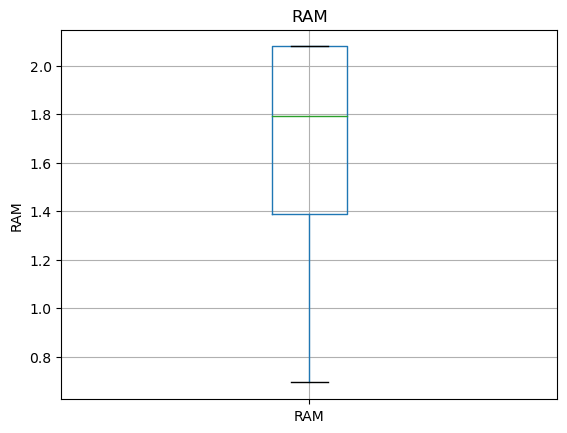

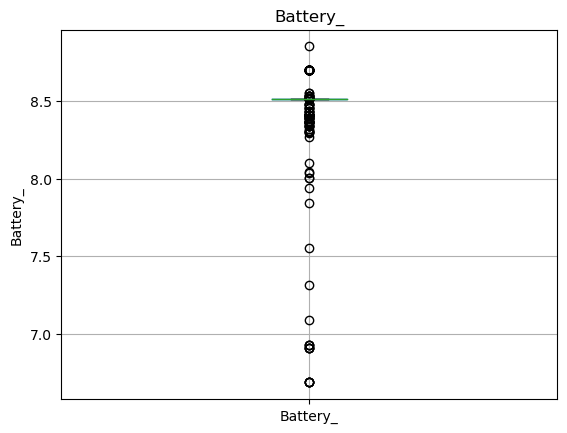

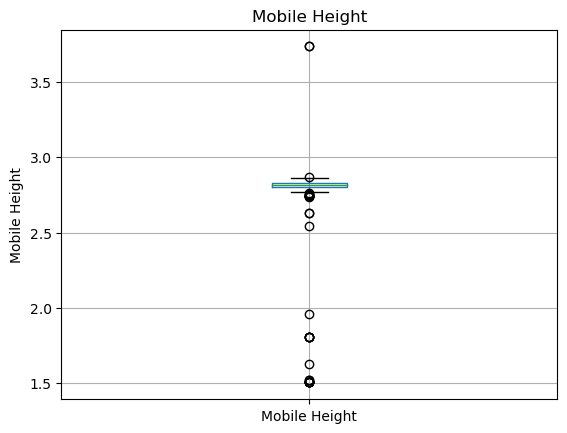

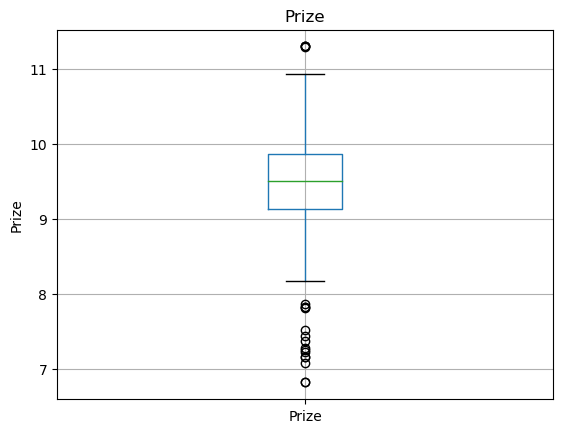

In [52]:
for feature in numerical_features:
    Mobile_dataset_outlier = Mobile_dataset_encod.copy()
    if 0 in Mobile_dataset_outlier[feature].unique():
        pass
    else:
        Mobile_dataset_outlier[feature] = np.log(Mobile_dataset_outlier[feature])
        Mobile_dataset_outlier.boxplot(column=feature)
        plt.ylabel(feature)
        plt.title(feature)
        plt.show()

In [53]:
outliers = [] 

def detect_outliers_iqr(Data):
    data = sorted(Data)
    q1= np.percentile(Data,25)
    q3= np.percentile(Data,75)
    # print(q1,q3)
    IQR = q3 - q1
    lwr_bound = q1-(1.5*IQR)
    upr_bound = q3+(1.5*IQR)
    # print(lwr_bound, upr_bound)
    for i in Data:
        if(i<lwr_bound or i>upr_bound):
            outliers.append(i)
    return outliers

In [54]:
outliers = detect_outliers_iqr(Mobile_dataset_encod['Prize'])
outliers

[49999,
 44999,
 34999,
 43999,
 43999,
 43999,
 36999,
 49999,
 55999,
 55999,
 34999,
 55999,
 38920,
 40999,
 41199,
 49999,
 80999,
 35999,
 40999,
 80999,
 34688,
 80999,
 53999,
 79999,
 38999]

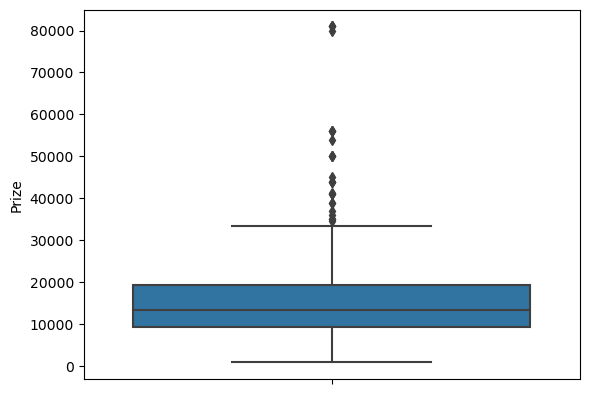

In [55]:
sns.boxplot(y ='Prize', data= Mobile_dataset_encod)
plt.show()

19280.0
9290.0
9990.0
-5695.0
34265.0
(541, 469)
(516, 469)


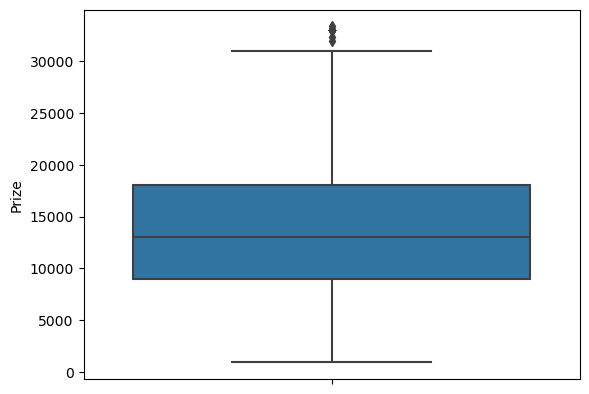

In [56]:
q3 = Mobile_dataset_encod['Prize'].quantile(0.75)
q1 = Mobile_dataset_encod['Prize'].quantile(0.25)
print(q3)
print(q1)

IQR = q3 -q1
print(IQR)

lower_limit = q1 - (IQR * 1.5)
upper_limit = q3 + (IQR * 1.5)
print(lower_limit)
print(upper_limit)

Prize_outliers = np.where(Mobile_dataset_encod['Prize'] > upper_limit, True, 
                               np.where(Mobile_dataset_encod['Prize'] < lower_limit, True, False))



Mobile_price_encoded = Mobile_dataset_encod.loc[~(Prize_outliers)]

print(Mobile_dataset_encod.shape)
print(Mobile_price_encoded.shape)

sns.boxplot(y = 'Prize', data=Mobile_price_encoded)
plt.show()

In [57]:
outliers = detect_outliers_iqr(Mobile_dataset_encod['Mobile Height'])
outliers

[49999,
 44999,
 34999,
 43999,
 43999,
 43999,
 36999,
 49999,
 55999,
 55999,
 34999,
 55999,
 38920,
 40999,
 41199,
 49999,
 80999,
 35999,
 40999,
 80999,
 34688,
 80999,
 53999,
 79999,
 38999,
 41.94,
 41.94,
 4.5,
 7.11,
 4.5,
 4.5,
 6.1,
 15.6,
 15.6,
 5.08,
 4.5,
 6.1,
 4.5,
 4.5,
 6.1,
 15.46,
 6.1,
 4.5,
 4.57,
 4.57,
 6.1,
 15.49,
 15.49,
 15.49,
 15.7,
 15.8,
 13.84,
 13.84,
 15.49,
 17.65,
 15.49,
 15.49,
 12.7]

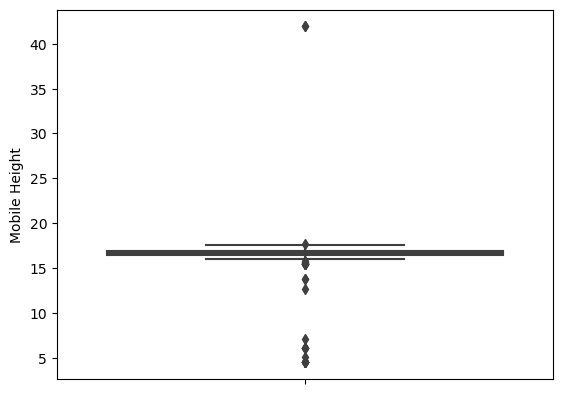

In [58]:
sns.boxplot(y ='Mobile Height', data= Mobile_dataset_encod)
plt.show()

16.94
16.51
0.4299999999999997
15.865000000000002
17.585
(541, 469)
(508, 469)


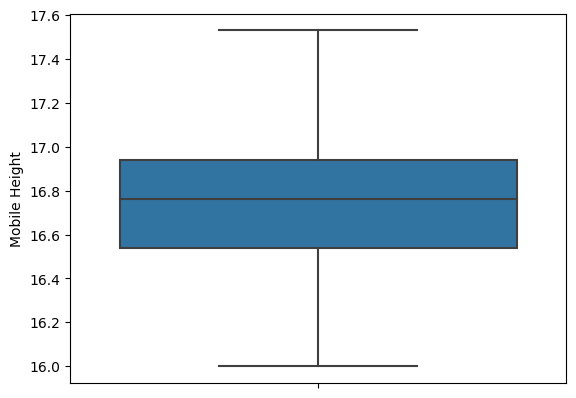

In [59]:
q3 = Mobile_dataset_encod['Mobile Height'].quantile(0.75)
q1 = Mobile_dataset_encod['Mobile Height'].quantile(0.25)
print(q3)
print(q1)

IQR = q3 -q1
print(IQR)

lower_limit = q1 - (IQR * 1.5)
upper_limit = q3 + (IQR * 1.5)
print(lower_limit)
print(upper_limit)

Mobile_height_outliers = np.where(Mobile_dataset_encod['Mobile Height'] > upper_limit, True, 
                               np.where(Mobile_dataset_encod['Mobile Height'] < lower_limit, True, False))



Mobile_price_encoded = Mobile_dataset_encod.loc[~(Mobile_height_outliers)]

print(Mobile_dataset_encod.shape)
print(Mobile_price_encoded.shape)

sns.boxplot(y = 'Mobile Height', data=Mobile_price_encoded)
plt.show()

In [60]:
outliers = detect_outliers_iqr(Mobile_dataset_encod['Battery_'])
outliers

[49999,
 44999,
 34999,
 43999,
 43999,
 43999,
 36999,
 49999,
 55999,
 55999,
 34999,
 55999,
 38920,
 40999,
 41199,
 49999,
 80999,
 35999,
 40999,
 80999,
 34688,
 80999,
 53999,
 79999,
 38999,
 41.94,
 41.94,
 4.5,
 7.11,
 4.5,
 4.5,
 6.1,
 15.6,
 15.6,
 5.08,
 4.5,
 6.1,
 4.5,
 4.5,
 6.1,
 15.46,
 6.1,
 4.5,
 4.57,
 4.57,
 6.1,
 15.49,
 15.49,
 15.49,
 15.7,
 15.8,
 13.84,
 13.84,
 15.49,
 17.65,
 15.49,
 15.49,
 12.7,
 6000,
 6000,
 6000,
 6000,
 6000,
 6000,
 6000,
 6000,
 6000,
 6000,
 4500,
 4500,
 4500,
 4500,
 6000,
 6000,
 6000,
 6000,
 6000,
 6000,
 6000,
 800,
 1900,
 6000,
 6000,
 6000,
 1000,
 4400,
 800,
 6000,
 6000,
 6000,
 1020,
 4410,
 4410,
 800,
 4400,
 800,
 1020,
 5080,
 6000,
 2550,
 800,
 1020,
 4980,
 4980,
 4500,
 4600,
 6000,
 6000,
 6000,
 6000,
 4600,
 6000,
 1200,
 1000,
 1000,
 1000,
 6000,
 1500,
 4980,
 4500,
 4500,
 6000,
 6000,
 6000,
 6000,
 4980,
 4400,
 4500,
 4980,
 3300,
 4500,
 4500,
 4020,
 4400,
 5080,
 4300,
 4300,
 4020,
 4800,
 4800,


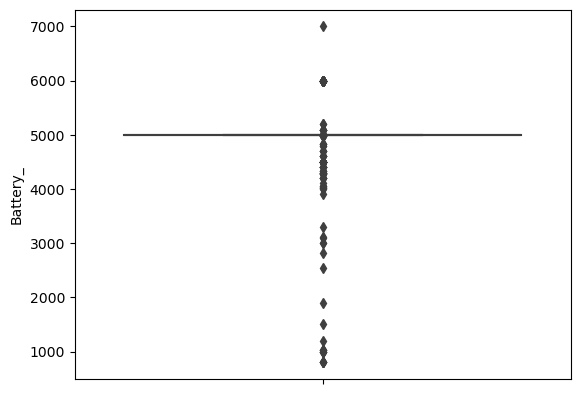

In [61]:
sns.boxplot(y ='Battery_', data=Mobile_dataset_encod)
plt.show()

5000.0
5000.0
0.0
5000.0
5000.0
(541, 469)
(389, 469)


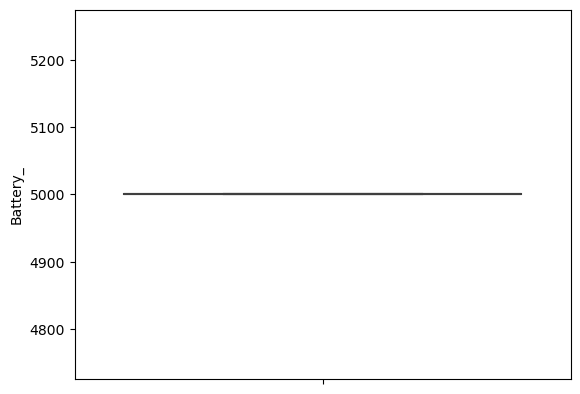

In [62]:
q3 = Mobile_dataset_encod['Battery_'].quantile(0.75)
q1 = Mobile_dataset_encod['Battery_'].quantile(0.25)
print(q3)
print(q1)

IQR = q3 -q1
print(IQR)

lower_limit = q1 - (IQR * 1.5)
upper_limit = q3 + (IQR * 1.5)
print(lower_limit)
print(upper_limit)

Battery_outliers = np.where(Mobile_dataset_encod['Battery_'] > upper_limit, True, 
                               np.where(Mobile_dataset_encod['Battery_'] < lower_limit, True, False))



Mobile_price_encoded = Mobile_dataset_encod.loc[~(Battery_outliers)]

print(Mobile_dataset_encod.shape)
print(Mobile_price_encoded.shape)

sns.boxplot(y = 'Battery_', data=Mobile_price_encoded)
plt.show()

In [63]:
Mobile_price_encoded

,Memory,RAM,Battery_,Rear Camera,Front Camera,AI Lens,Mobile Height,Processor_,Prize,0,...,450,451,452,453,454,455,456,457,458,459
2,128,8,5000,10.0,7.0,0,16.64,1.0,11999,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,32,2,5000,3.0,2.0,0,16.56,2.0,5649,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,128,8,5000,10.0,2.0,1,16.76,3.0,8999,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,128,8,5000,10.0,2.0,1,16.76,3.0,8999,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,128,8,5000,10.0,2.0,1,16.76,3.0,8999,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
534,64,4,5000,10.0,3.0,0,16.55,56.0,9790,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
535,64,3,5000,5.0,2.0,0,16.51,5.0,9999,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
538,64,4,5000,10.0,3.0,0,16.76,71.0,9990,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
539,128,8,5000,10.0,9.0,0,16.26,101.0,38999,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [64]:
# Reset the all Rows

Mobile_price_encoded.reset_index(drop=True, inplace=True)

# Printing the modified DataFrame
print(Mobile_price_encoded)


     Memory  RAM  Battery_  Rear Camera  Front Camera  AI Lens  Mobile Height  \
0       128    8      5000         10.0           7.0        0          16.64   
1        32    2      5000          3.0           2.0        0          16.56   
2       128    8      5000         10.0           2.0        1          16.76   
3       128    8      5000         10.0           2.0        1          16.76   
4       128    8      5000         10.0           2.0        1          16.76   
..      ...  ...       ...          ...           ...      ...            ...   
384      64    4      5000         10.0           3.0        0          16.55   
385      64    3      5000          5.0           2.0        0          16.51   
386      64    4      5000         10.0           3.0        0          16.76   
387     128    8      5000         10.0           9.0        0          16.26   
388     128    4      5000         10.0           3.0        0          16.66   

     Processor_  Prize    0

In [65]:
Mobile_price_encoded

,Memory,RAM,Battery_,Rear Camera,Front Camera,AI Lens,Mobile Height,Processor_,Prize,0,...,450,451,452,453,454,455,456,457,458,459
0,128,8,5000,10.0,7.0,0,16.64,1.0,11999,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,32,2,5000,3.0,2.0,0,16.56,2.0,5649,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,128,8,5000,10.0,2.0,1,16.76,3.0,8999,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,128,8,5000,10.0,2.0,1,16.76,3.0,8999,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,128,8,5000,10.0,2.0,1,16.76,3.0,8999,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
384,64,4,5000,10.0,3.0,0,16.55,56.0,9790,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
385,64,3,5000,5.0,2.0,0,16.51,5.0,9999,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
386,64,4,5000,10.0,3.0,0,16.76,71.0,9990,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
387,128,8,5000,10.0,9.0,0,16.26,101.0,38999,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [66]:
Mobile_price_encoded.select_dtypes(include='object').columns.tolist()

[]

In [67]:
Mobile_price_encoded.isnull().sum().sum()

0

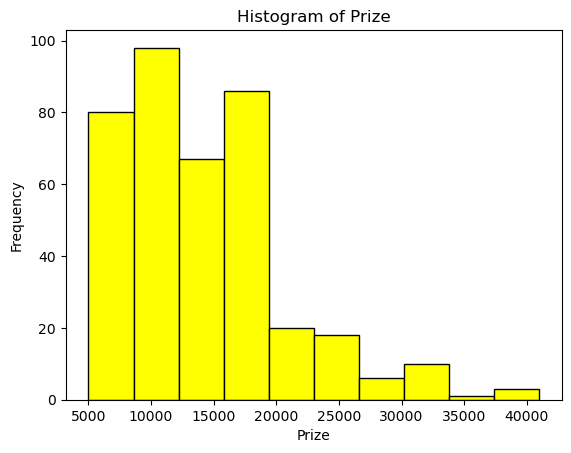

In [68]:
# Plot Histogram

plt.hist(Mobile_price_encoded['Prize'],color = 'yellow', edgecolor= 'black', bins = 10)
plt.title('Histogram of Prize')
plt.xlabel('Prize')
plt.ylabel('Frequency')
plt.show()

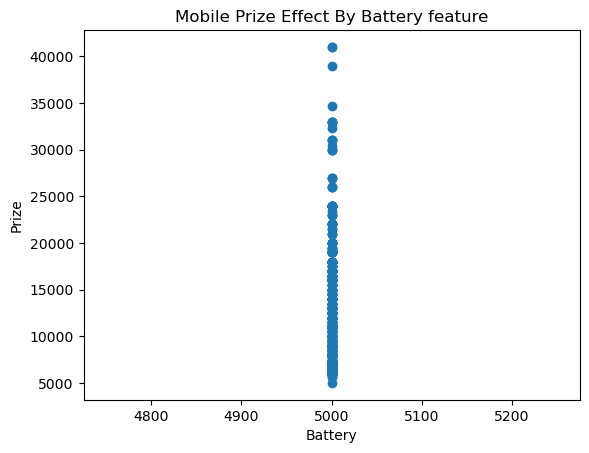

In [69]:
# Plot Scatter

plt.scatter(Mobile_price_encoded['Battery_'], Mobile_price_encoded['Prize'])
plt.xlabel('Battery')
plt.ylabel('Prize')
plt.title('Mobile Prize Effect By Battery feature')
plt.show()

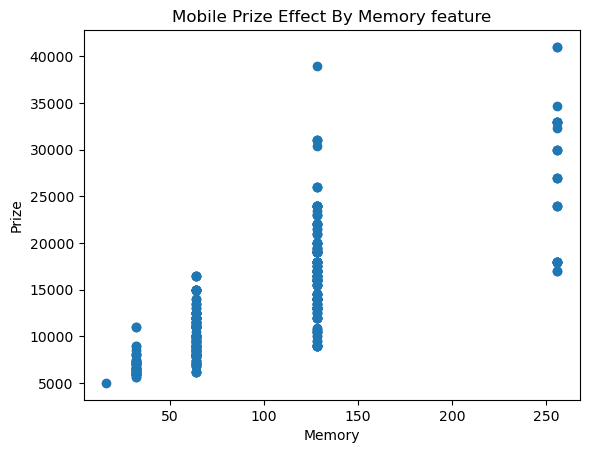

In [70]:
plt.scatter(Mobile_price_encoded['Memory'], Mobile_price_encoded['Prize'])
plt.xlabel('Memory')
plt.ylabel('Prize')
plt.title('Mobile Prize Effect By Memory feature')
plt.show()

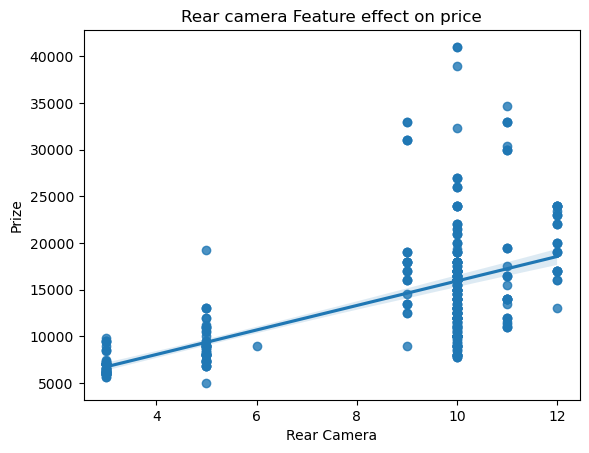

In [71]:
# Plot Regplot

sns.regplot(x='Rear Camera', y='Prize', data=Mobile_price_encoded)
plt.title('Rear camera Feature effect on price')
plt.show()

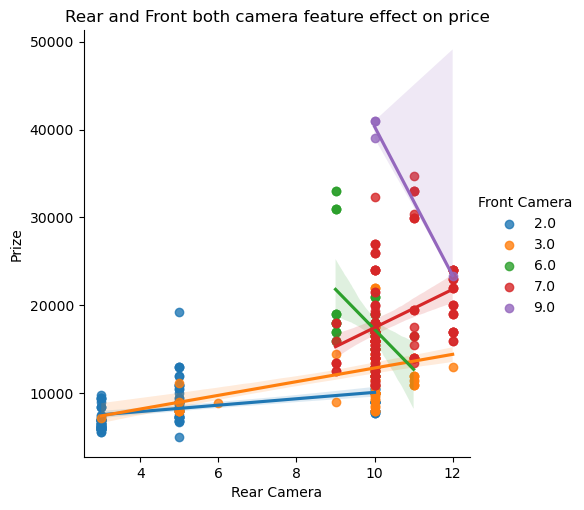

In [72]:
# Plot LMplot

sns.lmplot(x='Rear Camera', y='Prize', hue='Front Camera', data=Mobile_price_encoded)
plt.title('Rear and Front both camera feature effect on price')
plt.show()

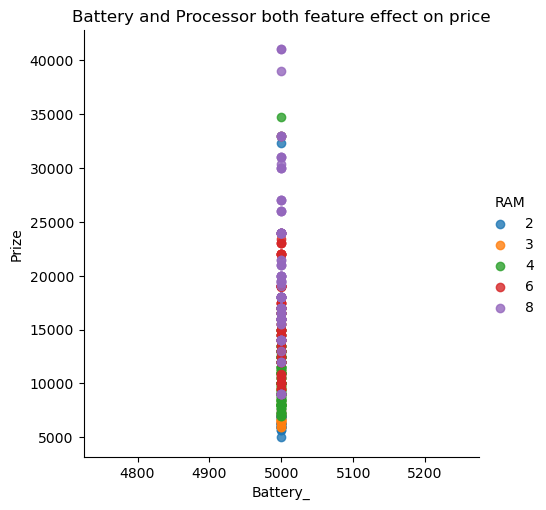

In [73]:
sns.lmplot(x='Battery_', y='Prize', hue='RAM', data=Mobile_price_encoded)
plt.title('Battery and Processor both feature effect on price')
plt.show()

# Correlation Analysis

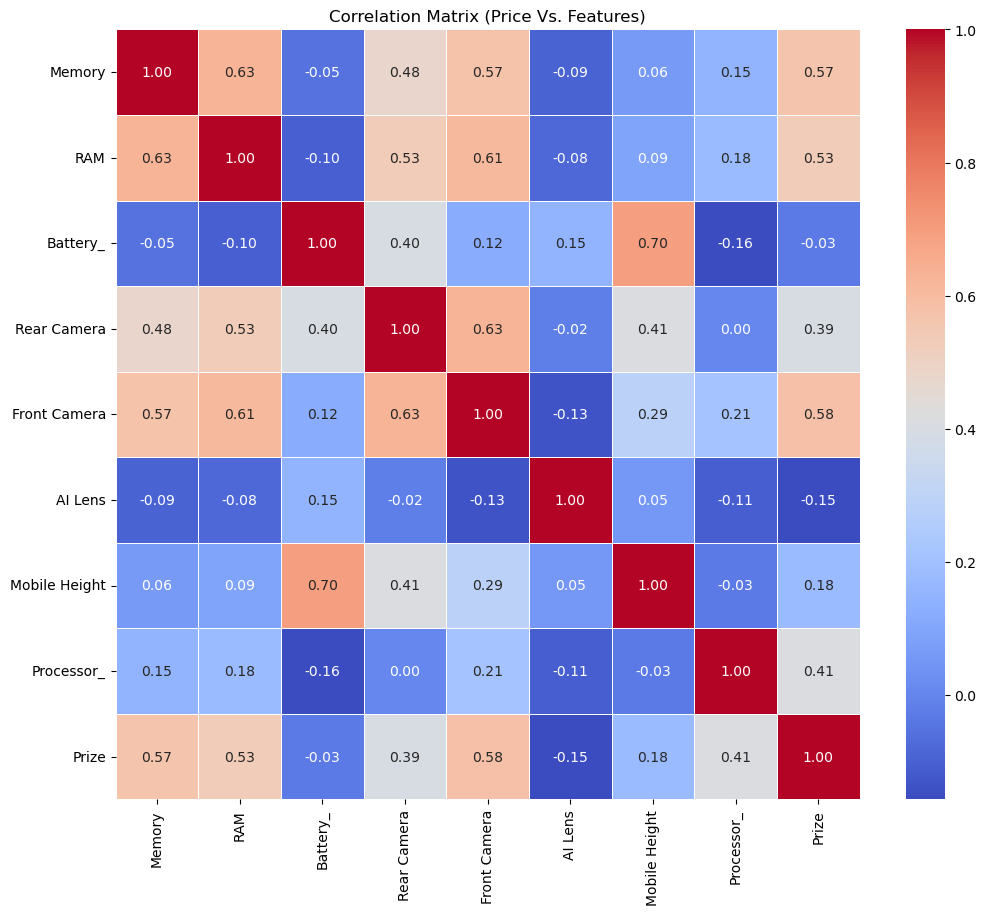

In [74]:
# Finding Correlations

corr_matrix = Mobile_dataset[['Memory','RAM','Battery_','Rear Camera','Front Camera','AI Lens','Mobile Height','Processor_','Prize']].corr()

# plot the heat map
plt.figure(figsize=(12,10))
sns.heatmap(corr_matrix, annot = True, cmap = 'coolwarm', fmt = '.2f', linewidth= 0.5)
plt.title('Correlation Matrix (Price Vs. Features)')
plt.show()

# Feature Selection and Feature Extraction for the Important Outcomes

In [75]:
# Feature Selection and Feature Extraction

from sklearn.feature_selection import SelectKBest, f_regression

x = Mobile_price_encoded[['Memory','RAM','Battery_','Rear Camera','Front Camera','AI Lens','Mobile Height','Processor_']]
y = Mobile_price_encoded['Prize']

selector = SelectKBest(score_func = f_regression, k=5)

x_selected = selector.fit_transform(x, y)

Selected_features = x.columns[selector.get_support()]

print('Selected_features')
print(Selected_features)


Selected_features
Index(['Memory', 'RAM', 'Rear Camera', 'Front Camera', 'Processor_'], dtype='object')


# Split The Dataset into Training and Testing Sets

In [76]:
# Splitting the datasets into Training and Testing sets (e.g, 80% train, 20%sets)
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.20,  random_state=0)

print('Training set Shape:', x_train.shape, y_train.shape)
print('Testing set Shape:', x_test.shape, y_test.shape)

Training set Shape: (311, 8) (311,)
Testing set Shape: (78, 8) (78,)


# Build And Train Regression Models

## Linear Regression

In [77]:
lrg = LinearRegression()
lrg.fit(x_train, y_train)

LinearRegression()

## Random Forest Regression

In [78]:
Rf_reg = RandomForestRegressor()
Rf_reg.fit(x_train, y_train)

RandomForestRegressor()

## Decision Tree Regressor

In [79]:
Decision_tree_reg = DecisionTreeRegressor()
Decision_tree_reg.fit(x_train, y_train)

DecisionTreeRegressor()

# Evaluate The Model Perfomance

In [80]:
# Evaluate the Model Perfomance

def evaluate_model(model, x_test, y_test):
    # Prdict on the test set
    y_pred = model.predict(x_test)
    
    
    # Calculate the Mean Absolute Error(MAE) and Root Mean Squared Error(RMSE)
    mae = mean_absolute_error (y_test, y_pred)
    rmse = mean_squared_error (y_test, y_pred, squared= False)
    
    return mae, rmse

# Evalute Linear Regression Model
lrg_mae, lrg_rmse = evaluate_model(lrg, x_test, y_test)

# Evaluate The RandomForest Regression Model
Rf_reg_mae, Rf_reg_rmse = evaluate_model(Rf_reg, x_test, y_test)

# Evaluate Decision Tree Regression Model
Decision_tree_reg_mae, Decision_tree_reg_rmse = evaluate_model(Decision_tree_reg, x_test, y_test)

print('Linear Regression:')
print('MAE:', lrg_mae)
print('RMSE:', lrg_rmse)
print()

print('Random Forest Regression:')
print('MAE:', Rf_reg_mae)
print('RMSE:', Rf_reg_rmse)
print()

print('Decision Tree Regression:')
print('MAE:', Decision_tree_reg_mae)
print('RMSE:', Decision_tree_reg_rmse)

Linear Regression:
MAE: 2362.423148362015
RMSE: 3330.1820211099966

Random Forest Regression:
MAE: 1336.2794024725274
RMSE: 2628.7923133438408

Decision Tree Regression:
MAE: 1319.6858974358975
RMSE: 3839.089200387608


# Report and Visualization for Price Prediction

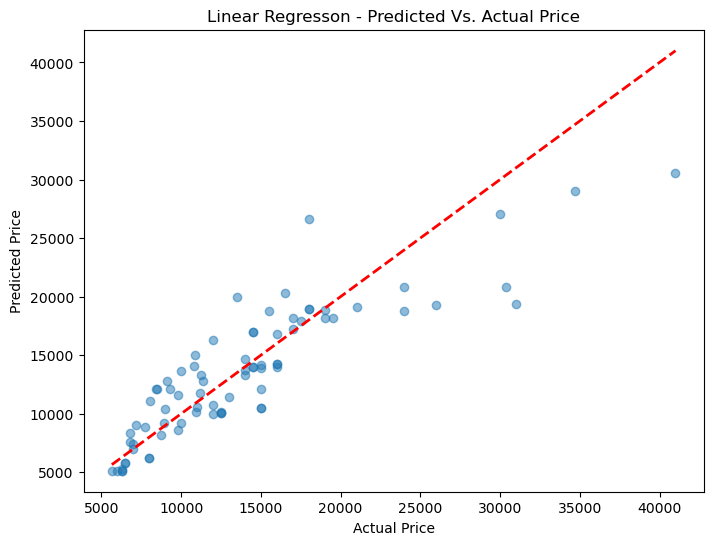

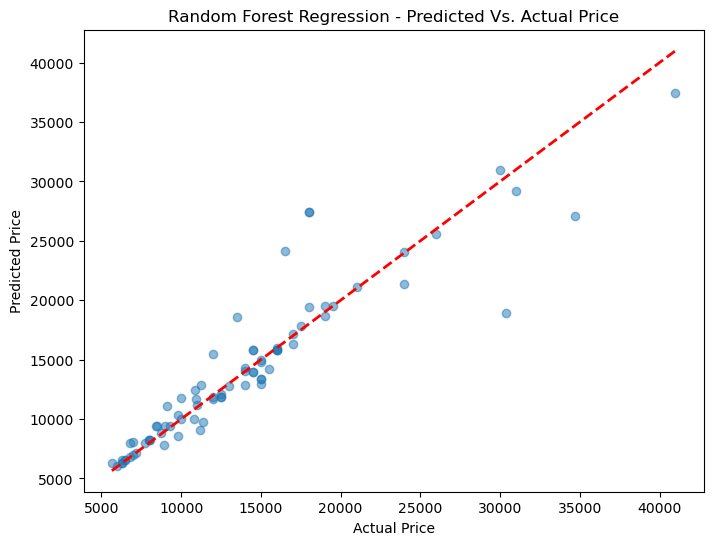

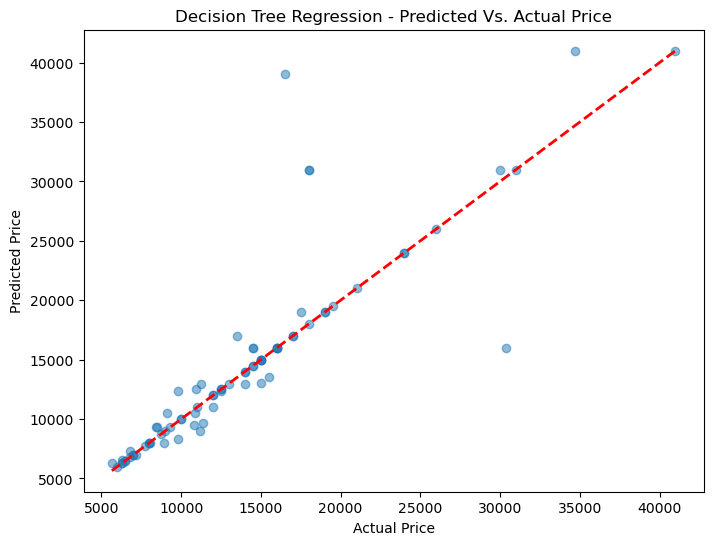

In [81]:
# Plot The Predict Vs. Actual Price

def plot_predict(model, x_test, y_test, model_name):
    
    y_pred = model.predict(x_test)
    
    plt.figure (figsize=(8,6))
    plt.scatter(y_test, y_pred, alpha=0.5)
    plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'r--', lw=2)
    plt.xlabel('Actual Price')
    plt.ylabel('Predicted Price')
    plt.title(f'{model_name} - Predicted Vs. Actual Price')
    plt.show()
    
# plot Linear Regression Predictor
plot_predict(lrg, x_test, y_test, 'Linear Regresson')

# Plot Randon Forest Regression Predictor
plot_predict(Rf_reg, x_test, y_test, 'Random Forest Regression')

# Plot Decision Tree Regression Predictor
plot_predict(Decision_tree_reg, x_test, y_test, 'Decision Tree Regression')

# Visualizing The Feature Importances

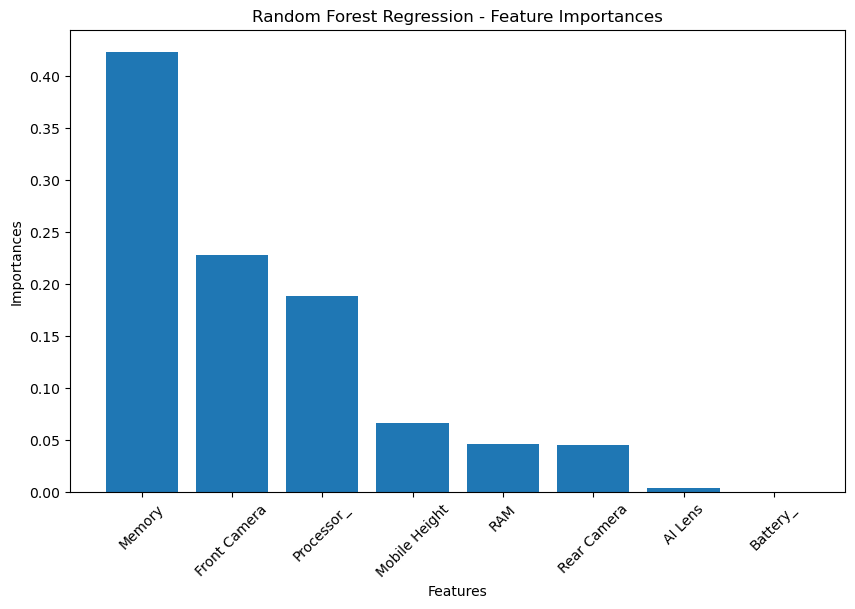

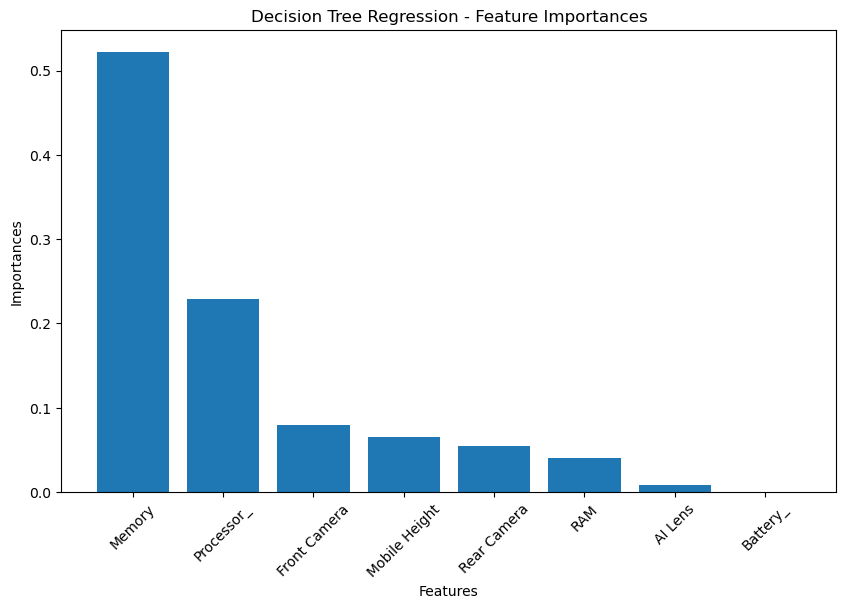

In [82]:
# Visualize the Important Features

def plot_feature_importances(model,feature_names , model_name):
    importances = model.feature_importances_
    
    indices = np.argsort(importances)[::-1]
    
    plt.figure(figsize=(10,6))
    plt.bar(range(len(feature_names)), importances[indices], align = 'center')
    plt.xticks(range(len(feature_names)), [feature_names[i] for i in indices], rotation=45)
    plt.xlabel('Features')
    plt.ylabel('Importances')
    plt.title(f'{model_name} - Feature Importances')
    plt.show()

feature_names = ['Memory','RAM','Battery_','Rear Camera','Front Camera','AI Lens','Mobile Height','Processor_']

plot_feature_importances(Rf_reg, feature_names, 'Random Forest Regression')
plot_feature_importances(Decision_tree_reg, feature_names, 'Decision Tree Regression')